In [1]:
%%html
<style>
table {margin-left: 0 !important}
</style>

# IN-STK5000 - Project 1: Credit
### Group 9: Anette Fredriksen, Adrian Eriksen, Maren Aamodt

# Contents:
- [Introduction](#introduction)
- [Part 1: Constructing a model](#part1)
    * [A closer look at the dataset](#part1_section1)
    * [Model development](#part1_section2)
- [Part 2: Risks and privacy](#part2)
    * [Risks concerning our model](#part2_section1)
    * [Data privacy](#part2_section2)
- [Part 3: Fairness](#part3)
    * [Choosing a concept of fairness](#part3_section1)
    * [Some statistics](#part3_section2)
    * [Measuring variation](#part3_section3)
    * [Taking amount into account](#part3_section4)
    * [Balancing privacy and utility](#part3_section5)
- [Summary](#part4)
- [Sources](#sources)

# Introduction <a class="anchor" id="introduction"></a>

This project is about making a model that can predict if a loan is profitable, and grant loans accordingly. To train our model, we are using a dataset containing data from German loaners. The original data set can be found [here](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)).

In the first part our project, we develop the model that should predict whether a loan should be granted or not. We also reflect on the dataset features.

In part two, privacy is taken into consideration. We discuss whether the data is secured sufficiently, and how to improve the privacy in our model. 

In the third and final part of the project, the fairness of our model is analysed and improved.

Some comments regarding the code: 
The main code will be anadma_banker.py and TestLending.py  
We also have a script called TestLending2.py, where most of our experiments can be found.
We mainly used TestLending2.py to produce different plots and data, as we found it a bit messy to have code implementations in our report. 

# Part 1: Constructing a model <a class="anchor" id="part1"></a>

## 1.1 A closer look at the dataset <a id="part1_section1"></a>

### The target attribute
The label in the dataset represent information about people who has taken out a loan, and the response variable is if they paid the loan back or not. In the original dataset, the value $1$ represents the loan being paid back, and the value $2$ that they did not. However, in our project we use action that have values $1$ and $0$, where $1$ is when the money is paid back and $0$ when it is not. Therefore we need to map $2$ to $0$, and this is done with a function added to TestLending.py. 

### Important features
Some features will be more central than others in the evaluation of a loaners credibility. It is reasonable to assume that *employment*, *credit history* and *other debtors* are some of the variables that have most influence on the prediction process. 

If a person is not employed, they would have a very low income, which would affect the ability for downpayment. Similarly, if a person has a bad credit history, or has other debtors as well, their ability to pay back the loan could be worsened.

### The feature characteristics
Our dataset has both numerical and qualitative features. They are listed separately below:


| Numerical features |     |                |             |        |         |         |
|:-------------------|:----|:---------------|:------------|:-------|:--------|:--------|
|  Duration          | Age | Residence time | Installment | Amount | Persons | Credits |  

| Qualitative features |       |                    |                |         |          |         |
|:---------------------|:------|:-------------------|:---------------|:--------|:---------|:--------|
| Account balance      | Job   | Other installments | Employment     | Housing | Property | Foreign |
| Credit history       | Phone | Other debtors      | Marital Status | Purpose | Savings  |  
   
   
#### Looking closer at each feature and its importance:
##### The qualitative features:
- **checking account balance**: Status of existing checking account. If a potential loaner has an existing checking account with a negative balance, it would mean the person is in debt, which is not desirable for the bank when considering downpayment. Having a positive value however, is most likely good. Most of the people in the dataset has no existing checking account, and they are also most likely to pay back.


- **credit history**: Whether the loaner has a good credit history could tell a lot about the ability to pay back a future loan. 


- **purpose**: What the is loan being used for. The utility outcome of these different usages are unclear. It could be reasonable to assume that loans being used to fund things that does not lose value could be advantageous. Also, funding of things that gets a future value (e.g. an education that leads to the loaner earning more money later) would be beneficial.


- **savings accounts/bonds**: If a person has a savings account with a decent amount of money, we can assume their ability to pay back is better than a person with no money saved. 


- **employment**: The most important difference in this feature is whether a the loaner has a job or not. Also, with increased years of employment, the certainty of them keeping the job will presumably be higher. For the bank, it is desirable that the loaner has a job, because they will have an income and thus will be better at paying down the loan.
    + under a year, 1-4 years, 4-7 years or more than 7 years.


- **marital status**: This attribute tells both the loaner's gender, and their marital status. Unfortunately, there seems to be some sort of error in the dataset. Firstly, single women ('A951') is not represented. Secondly, there seems to be bias issues, as men has three cathegories of marital status, while female has two: single or married/separated/divorced. The dataset is distributed like this:
```
Male divorced/separated: 50
Male single: 548
Male married: 92
Female divorced/separated/married: 310
Female single: 0
```

- **other debtors**: Describes whether the loaner has a co-applicant or a guarantor. If they have, there are more people responsible to pay back the loan, which means a lower risk for the bank.


- **property**: Describes if the loaner has any property that could be taken as a collateral should the loaner not be able to pay. It could give the bank some extra security.


- **other installment plans**: If the loaner has other installment plans, it means they are paying down other purchases. That means they might be less able to pay down their loan, and is therefore less attractive to the bank.


- **housing**: Housing has three categories: rent, own and for free. If a loaner is renting their home, it might be that their cash flow is lower, because a part of their income is used to pay rent. Owning their home might mean they have increased maintenance costs, but they also have some property value that could be used should they not be able to pay. 


- **job**: As mentioned briefly in the employment feature, the loaner having a job is a big security for the banker. In the job feature it is also categorized how skilled the loaner is. Unemployed and unskilled people have less prospects of getting a job that pays well. Similarly, the skilled and highly qualified employees are more likely to have a good salary, and thus a better ability to pay back a loan.


- **phone**: This feature is possibly quite outdated, as most people has a phone in 2020. Having a phone means the loaner is easier to contact.


- **foreign:** Whether a person is foreign or not. If the loaner is foreign, they might not be staying in the bank's country continously. There might be a possibility of the loaner moving before the loan is fully payed back. Also, the foreign might not be contstrained by the country's laws.

##### The numeric features:
- **duration**: How long time the loaner has to fully pay back the loan. Intuitively, a shorter loan duration means a shorter time of risk for the bank, which is good. However, a longer loan duration means more to gain on loan rates. Also, it might be easier for a loaner to pay a smaller amount over a longer period of time, than to pay bigger amounts over a shorter period time.  


- **amount**: The credit amount is in some ways crucial to how much of a utility the bank gets: low amounts limits the profit, but it also limits the loss if the loaner does not pay back. Similarly high amounts increases the possible profit, but also increases the risk.


- **installment**: The installment rate in percentage of disposable income. This feature gives a good indication on how much the loaner is able to pay based on their income.


- **residence time**: How long a loaner has lived in the same place.

- **age**: The loaners age could indirectly say something about e.g. their income, and therefore something about their ability to pay. However it should not affect the loan decision by itself. It would be very unfair deciding a loan grant only based on someone's age.


- **credits**: The number of existing credits at this bank. It does not seem like it affects the loaners to pay back the loan, as the ratio of people paying back is even for all values.


- **persons**: "Number of people being liable to provide maintenance for". This feature is not easy to understand. It has the values 1 and 2, and could either mean number of people helping to pay back the loan, or number of people the loaner is providing for (i.e. their family). 

### Is the dataset suitable?
It is uncertain that the variables that make Germans pay back a loan are the same as they would be for e.g. Norwegians. Also, the dataset was collected in 1994, which could mean that some of the features, e.g. the 'has a phone' feature, is outdated. This should be taken into consideration before applying this dataset to predict credibility in the current time, and in other countries than Germany. 

## 1.2 Model development <a id="part1_section2"></a>

### The chosen classifier
We chose Naive Bayes to fit our model, this is done with sklearn using Multinomial Naive Bayes. Naive Bayes is good with classification problems, also where the variables have strong dependencies.[2]

To optimize the Naive Bayes model, we tried out different values for the hyperparameter $\alpha$. We tried with $\alpha = [10, 1, 0.1, 0.01, 0.001, 0.0001]$, and using 100 test with random test training splits, the one who gave the best result in utility and return of investement is $\alpha = 0.1$. There the result is:
```
Average utility: 1189804.97

95% confidence interval utility (1129586.52, 1250023.41)

Average return on investment: 185.65

95% confidence interval return on investment (176.13, 195.18)
```

|Result histograms |     |
-----|-------
|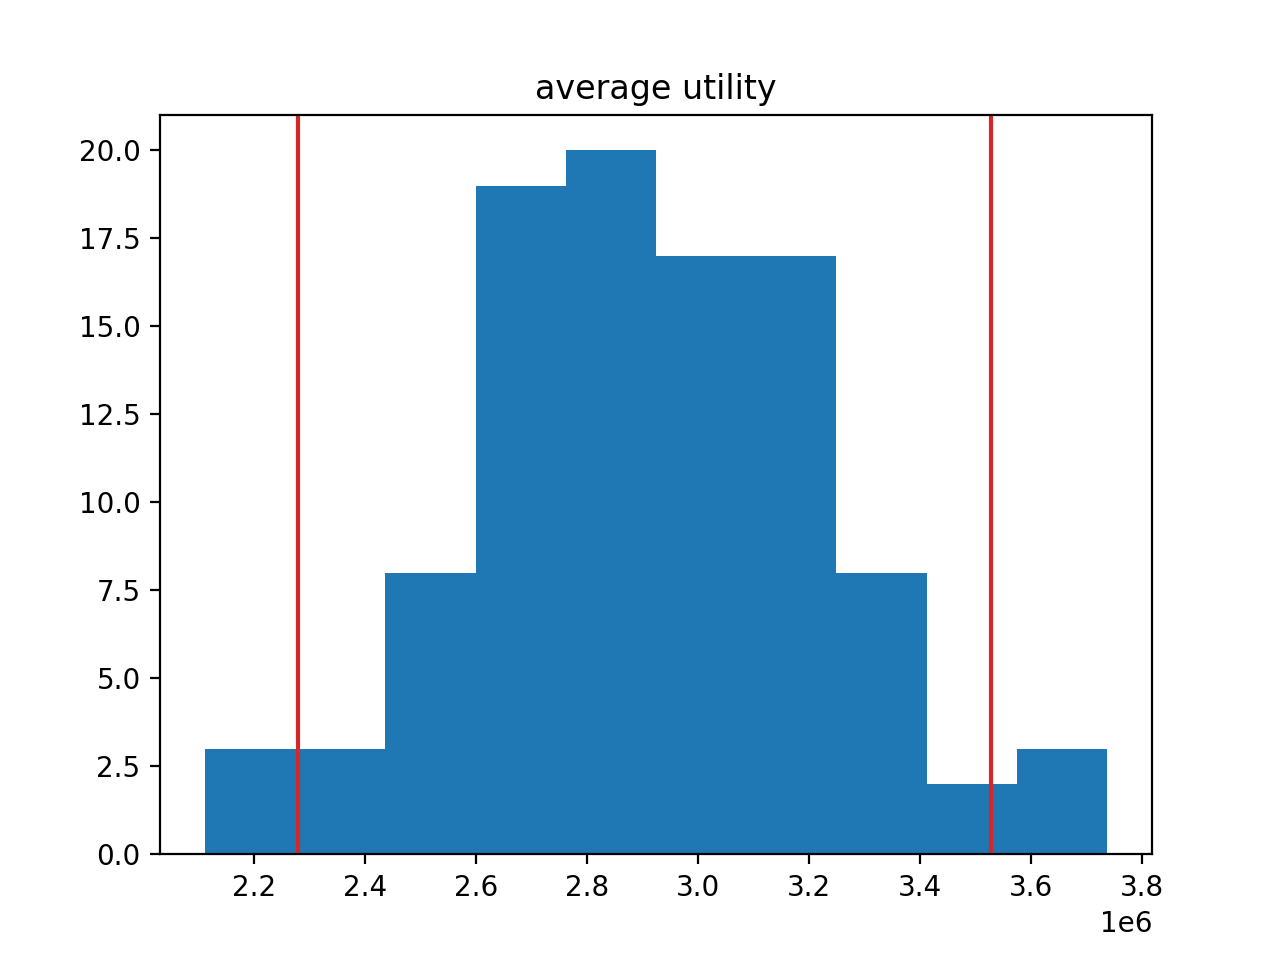|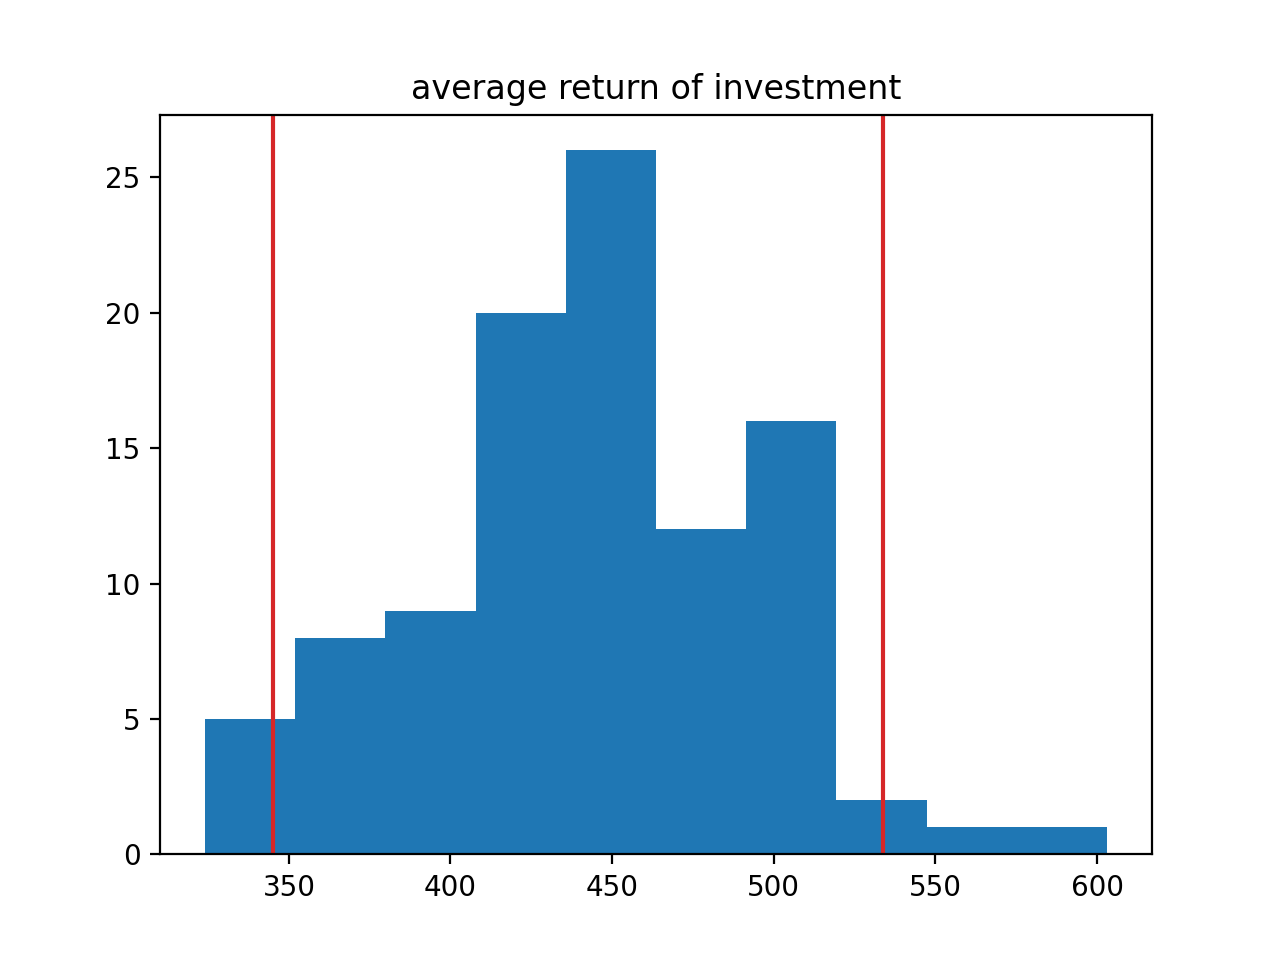|


### Predicting the utility
The *expected_utility()* function is used to calculate the probable income or loss. It will be a loss of income if the person does not pay back, so if the *fit()* function predicts a low possibility of getting paid back, we will not grant a loan.

To predict the expected utility, we used the formula

$$E_\textrm{utility} = 
P(\textrm{paying back}) \cdot \textrm{amount} 
\cdot (1 + \textrm{rate})^{\textrm{duration}} 
- (1 - P(\textrm{paying back})\cdot \textrm{amount}$$

The $P(\textrm{paying back})$ is predicted in the *predict_proba()* function, which returns the probability of the person downpaying the loan. The loan *amount*, loan *duration* and *rate* are all parametres gathered from the class' self.

We did not use *action* as a parameter in *expected_utility()*, like the random_baker did. Instead we used the prediction percentage from fit to chose an "action".

### The functions explained
`fit()` fits the Naive Bayes model. 

`set_interest_rate()` sets the interest rate.

`predict_proba()` uses the model made in *fit()* to predict probability for a given x (person).

`expected_utility()` uses *predict_proba()* to get a prediction probability.

`get_best_action()` uses *expected_utility()* and checks if the expected return is possitive, if the return is positive a loan is granted. 

As explained in the beginning of the part one section, we made a helper function in *TestLending.py*, called mapping. Mapping sets 2 to 0 in the response variable (meaning that the loan was not payed back). 

### Comparison of results 
Results from averaging over 100 random train test splits.

**Results for AnAdMa_banker:**

```
Average utility: 1173660.89

Average return on investment: 180.21
```

**Results for random_banker:**
```
Average utility: 566096.26

Average return on investment: 83.07
```

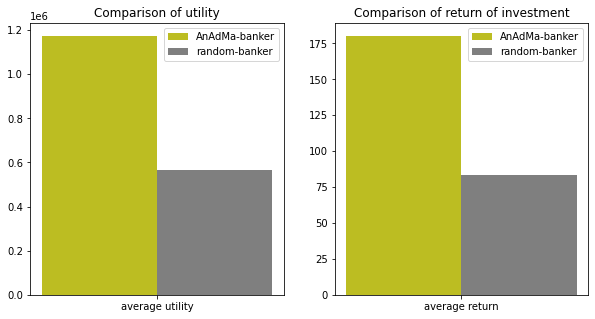

We can see that our model outperform *random_banker* by a lot.
This is expected, since the random banker is not considering any variables when granting loans. Our average return on investment is 216,9% higher than random_banker. 

# Part 2: Risks and privacy <a class="anchor" id="part2"></a>

## 2.1 Risks concerning our model <a id="part2_section1"></a>

### Does our policy maximise revenue?
We can never completley assure that our policy maximises revenue, but we can maximise expected revenue. The reason for this is that one can never be sure whether a person will be able to repay a loan.

### The uncertainty of limited and/or biased data
Taking the uncertainty of our limited and/or biased data into account is hard when we do not have a different dataset to test it up against. If we had this second dataset, we would at least be able to somewhat increase our certainty, based on the fact that we would have information from more than one source. Especially now, during a pandemic, we find it harder to trust data regarding economy and credit worthiness that's collected pre-corona. One way we could deal with this would be to create new data based on the one we posses, but if our original data is inherently flawed, then this might make the model worse. Another way would be to increase the expected utility necessary for granting loans, so that we take fewer risks. We could obviously also increase the interest rate, but in a real world scenario this might just lead to fewer customers and reduce our income. 

### The risks of our model being flawed (and how to handle it)
If it turns out our models predictions are in fact wrong, and we have decided credit for thousands of people based on it, it could possibly result in a disastrous loss of capital. To prevent this, there are a few ways we could minimize risk.

First of all, we could start out small with deciding credit for e.g. 1000 people. After that we could see how well the model performed and decide whether to make any adjustments. 

Another option is to start with only granting loans under a certain amount to make sure that we don't go bankrupt if our model is wrong. We could also create a threshold by finding the standard deviation and mean of expected utility and only grant loans within a given range.

Proposed algorithm: We set a maximum loan limit, because the loss would be greatest for large loans. Also, we set a minimum for the expected utility, so that loans with low profit (and smaller chance of the loaner repaying the loan) are rejected. In this way, we minimize the damage if it turns out our model is flawed. Also, as explained above, we limit the number of loaners to 1000 in our first run.

***Pseudocode: risk minimization*** 

---
```
loans_left = 1000

if (loan_size < max_loan 
    and expected_utility > min_utility 
    and loans != 1000):
       grant loan
       loans_left -= 1
else:
       do not grant loan
```
---

## 2.2 Data privacy <a id="part2_section2"></a>

### Privacy concerns 
A definition of privacy is: "Information privacy is the right to have some control over how your personal information is collected and used. ... Data privacy is focused on the use and governance of personal data—things like putting policies in place to ensure that consumers’ personal information is being collected, shared and used in appropriate ways."[3]  

Since we are dealing with data from EU citizens it is important to follow The General Data Protection Regulation (GDPR). To do this we have to make sure that the people in the dataset remain anonymous, while still having the right to have themselves removed from our database. We will not conisder the latter part, but focus on anonimisation of the data.

The dataset contains several sensitive features, e.g. the status of their current checking account, credit history and savings accounts. While this in itself might not raise any concerns, one can use their employment status, personal status and sex, property, housing status, age and job to concievably learn who this person is. This may not apply for all people in the database, but a lot of people have little regard for what information they make publicly available through Facebook and other social media. One must also consider the fact that this is the kind of information sought after by hackers, who usually have sophisticated ways of retrieving data from different sources. If the data in this database was made publicly available, it would not be hard for someone with the right skill set to learn the name of most people in the database. 

### Private database - public decisions
Making the database only available to the bank would significantly increase the privacy of the data. Making the credit decisions public would not necessarily affect this if there was no other metadata (like the time of the request) published. Given that we have two counters, one for yes and one for no, we find it hard to believe that someone could learn whether a given person is credit worthy based on this alone. That being said, the database only being known to the bank, doesn't necessarily guarantee security. There is always the risk of security breaches, whether it's through phishing attacks or employees selling information. The fact that the numbers are published, does relay the information that we have a database possibly containing valuable information.

If we want to add differential privacy to the decision, which would add privacy for new applicants, there are two mechanisms to consider: the randomized response or an exponential mechanism. The latter is preferred, because we then can take the utility into account. If we only privatize the decision, and not the historical data, e.g. our dataset, we would reveal more of the data every time we get a new query, which is definitely not desirable.

### Our privacy model

There are a few different ways to do protect the data of the people in the training set. We opted to use the laplace function for differential privacy on the numerical data and just implemented a random choice for the quantitative features. We could also use feature selection by removing columns should they prove to not affect the outcome of the model. Removing unnecessary features could also improve the fairness in our model.

People applying for new loans (e.g. the test set) will go through the same noise algorithms as the people in the training set.

#### Function implementation
To implement a private descision making mechanism, we added some functions to *TestLending.py*. First, we made a function `qua_noise(X)` that adds a *random.choice* variable to the quantitive features of *X*. 
Similarly, our `laplace_func(X)` function adds Laplace noise to the numeric features of *X*. Finally, the function `add_noise()` takes the *train* and *test* sets as arguments, and calls on the two noise adding functions described above to add noise to the sets. 

The noise is added before the sets are fitted to our decision making model. 

#### Loss in utility after adding privacy mechanisms
When privacy mechanisms are added, it is reasonable that some of the models utility gain could be lost. After running the model with the improved privacy, the mean of the results were:
```
Average utility: 1146573.69
Average return on investment: 178.52
```
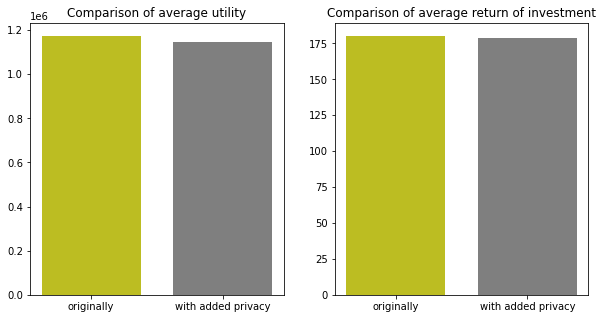

The loss in utility is seemlingly rather small, as the noise we add to the data is insignificant. 

When we try to increase the privacy of our model by further noising the data, we get significant swings in our expected utility. Our model may think that it is earning us a lot more money, but the fact would be that it would not in a real world setting. Another reason for this may be that we set all negative values to 0, so we can continue using Multinomial Naive Bayes. This way the utility will almost always be estimated to grow if we increase the noise.  
We would argue that as of now, we might not sufficiently privatise our data, but for the sake of having a somewhat realistic model, we decided to trade some privacy for utility.

# Part 3: Fairness <a class="anchor" id="part3"></a>

## 3.1 Choosing a concept of fairness <a id="part3_section1"></a>
"In the context of decision-making, fairness is the absence of any prejudice or favoritism toward an individual or a group based on their inherent or acquired characteristics. Thus, an unfair algorithm is one whose decisions are skewed toward a particular group of people." [4]    

For this part we originally chose to look at fairness in regards to foreign workers. However, it turned out that only 37 people out of 1000 in our dataset was foreign workers, 34 of which had repaid their initial loan. Because the number of foreign workers was so low, we decided to go for gender equality as suggested in the assignment.  
The first thing we did was to look at the data: 

| Gender | Amount | Repaid | Percentage | 
|:-------|:-------|:-------|:-----------| 
| Female | 310    | 201    | 64.8%      | 
| Male   | 690    | 499    | 72.3%      | 

We see that the majority of the dataset consists of males. One thing we also took note of was that there was 50 people unaccounted for in the code, as they were assigned 'marital status_A91', which is 'single male', but we did not get a column for this when importing the dataset with pandas.  

### Is our policy fair?
Creating a truly fair policy is close to impossible. Given that our policy will try to maximize utility, there will always be edge-cases that gets granted a loan when they shouldn't and vice versa.

### Sensitive variables
Some of the variables can be considered sensitive:  

Variable 9 / Personal status and sex,  whether a person is male or female should not determine if they get a loan. It can also be unfair to give loan based on people's marital status. 

Variable 13 / Age, to not give someone a loan based on their age is agedescrimination, this is not allowed in Norway. 

Variable 18 / Number of people being liable to provide maintenance for, this might be seen as discriminating people that are single and people from families that can not provide maintenance. 

Variable 20 / Foreign worker, to look at if a loan applicant is foreign might be seen as unfair. 

We believe it was some bias in data collection, because of the choice of these variables and the different categories in variable 9 have more categories for men than women.

## 3.2 Some statistics <a id="part3_section2"></a>

Because we have chosen to focus on fairness between the genders, it is natural to look at the what separates them in the dataset. First of all, we can look at their abilities to pay back their loans.

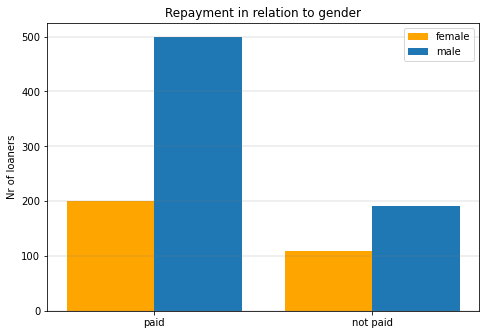

Since the dataset is unevenly distributed between the genders, it is more sensible to compare the results of the probabilities of paying back, given that the person is a certain gender, i.e. the conditional probabilities. 

In the dataset, we have 
- $P($repaid$|$male$) = 72.32 \%$
- $P($repaid$|$female$)= 64.84 \%$.

We can see that there are slightly less females paying back their loans.

Further, it is interesting to see if there are other differences between the genders. Here are some of the distributions:

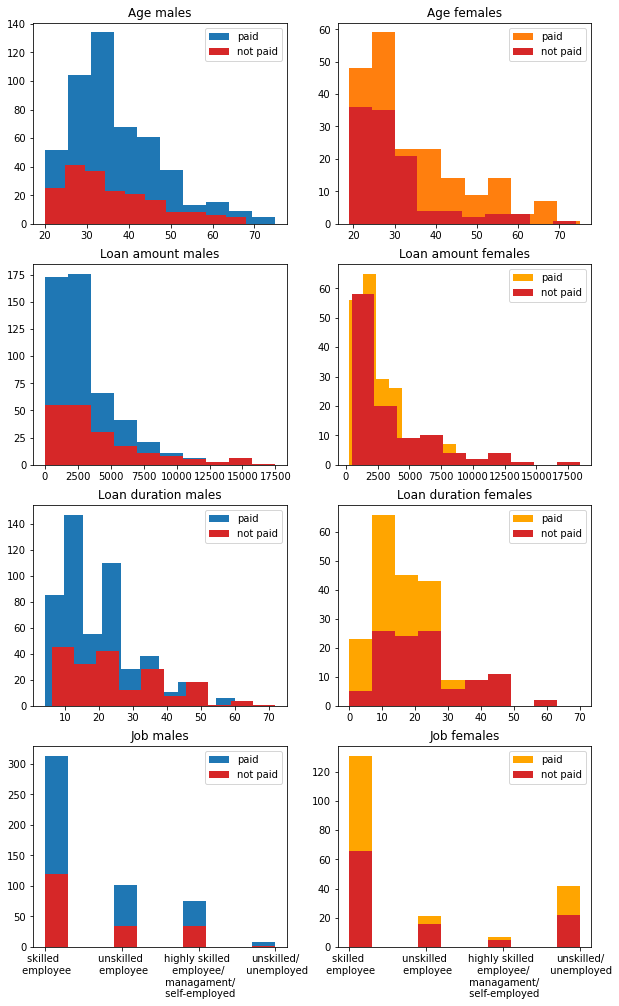

The distributions does not show any significant differences between the genders. It is however some slight variations, and it would be interesting to check the averages in the numerical features.

|feature |avg male|avg female|
|--------|--------|----------|
|duration|21.56   |19.44     |
|age	 |36.78   |32.80     |
|residence time	|2.83|2.87|
|installment	|3.04|2.83|
|amount	|3448.04|2877.77|
|persons	|1.20|1.05|
|credits	|1.44|1.33|

Some possible conclusions: The average female loaner is a few years younger than the average male loaner. Males loans more in average. The male scores slightly higher in the features *installment*, *persons*, and *credits*. 

Additionally, we can inspect the loaners age, loan amount and duration further. We scatter plot the amount and loaner age with colors separating females (*orange*) and males (*blue*):

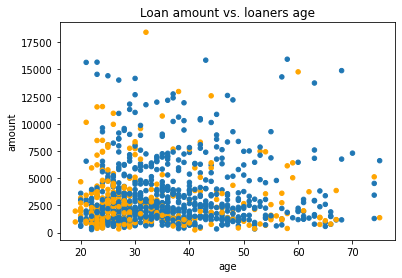

From the scatter plot it seems that there are more males getting loans higher than 10 000 DM (Deutsche Mark). What we have to keep in mind is that there are a lot more males in the data set. To see the actual difference in loan amounts between the genders, we have to look at the conditional probabilities:

- $P($loan over 10 000$|$female$) = 2.90 \%$
- $P($loan over 10 000$|$male$) = 4.49 \%$

In conclusion, there are slightly fewer females getting loans exceeding 10 000 DM.

The difference can also be studied with a box plot:

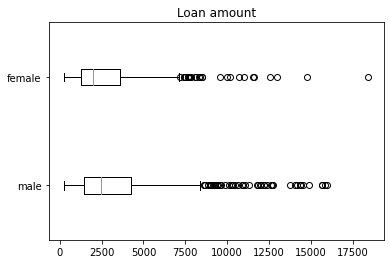

In the same way, we can observe the difference in the loan duration:
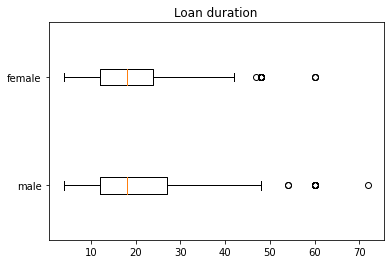

From the box plot, it is clear that the difference between the genders is modest.

## 3.3 Measuring variation <a id="part3_section3"></a>
*For balance (or calibration), measure the total variation of the action (or outcome) distribution for different outcomes (or actions) when the sensitive variable varies.*  
Plot utility for single/married men/women etc

When testing our decision maker, this was the results of loan granting in relation to gender:

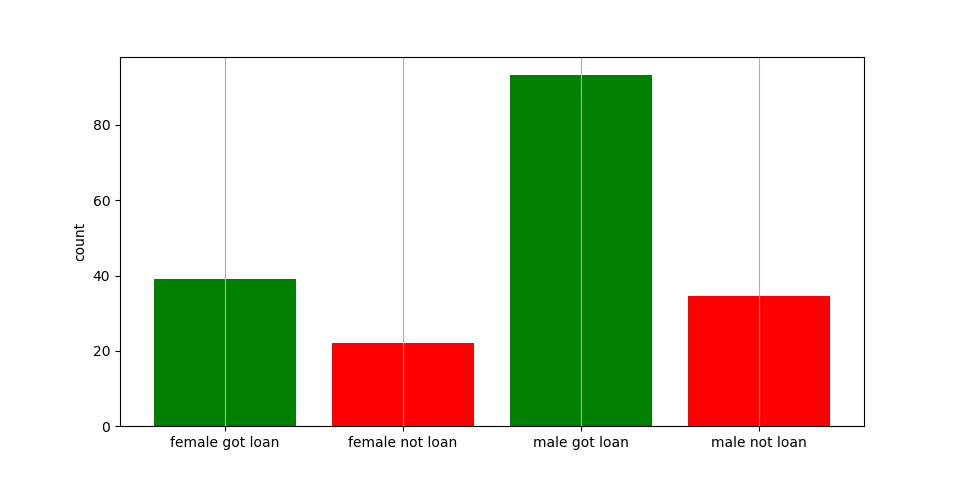

From the bar plot above, there seems to be a higher percentage of women not getting loans. 

However, to see if our model is fair when it comes to gender playing an important part in the decision mechanism, we can check the difference in utility with and without gender (or 'marital status') as feature.
The results are compared below:
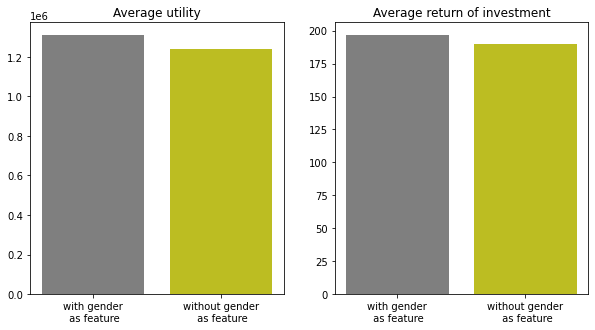

From the bar plot, we can see a slight loss in utility when we remove gender as a feature. This means our model partly uses gender to decide whether a person should be granted a loan. Therefore we can conclude our model is not entirely fair. The loss in utility should perhaps be accepted, in exchange of having a fair model. 

We can also check out our utility when removing other sensitive (and partly unneccesary) features. Below, we have measured utility when 'age' is removed as well.
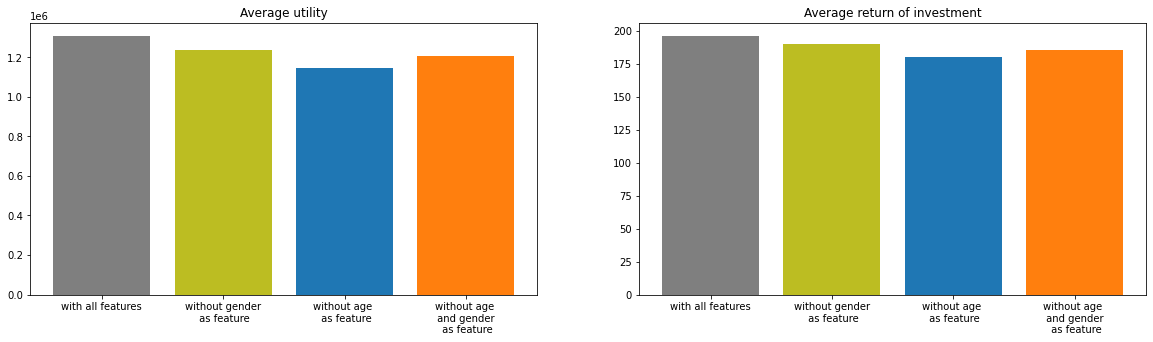

It is interesting that the utility seems to be better when removing both features, than when only removing the age feature.

## 3.4 Taking amount into account<a id="part3_section4"></a>
*Advanced: What would happen if you were looking at fairness by also taking into account the amount of loan requested?*  
To see what happened to the fairness of our model when we looked at specific amounts, we decided to test our model with three different limits. We wanted to see what happened to the fairness if we only granted loans under 1000 DM, between 1000 DM and 10.000 DM, and over 10.000 DM. All results are an average of 100 runs. For our first experiment we sat the limit to 1000 DM, and looked at the results:
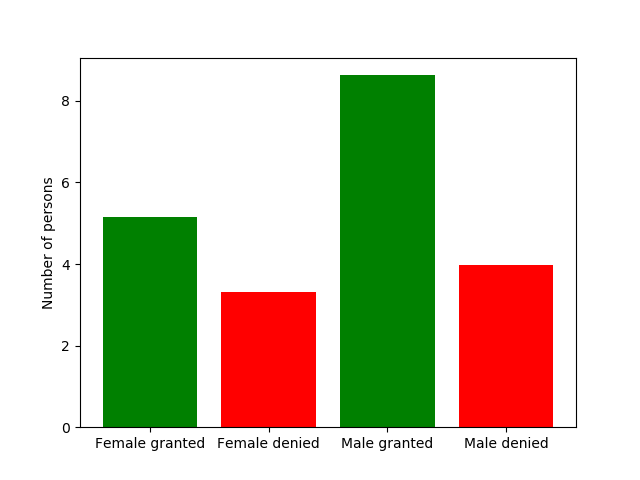  
As there are very few applicants for loans under 1000, we're dealing with relatively few people, but we believe that the percentages are still a good indicator of the fairness. For requests under 1000, we grant loans to 60.8% of women, and 68.4% of men. This is somewhat the same results as if we look at the raw data, which was that 72.3% of males repaid their loans while 64.8% of women did.  
When changing the limit to only granting loans between 1000 DM and 10.000 DM, we got the following:  
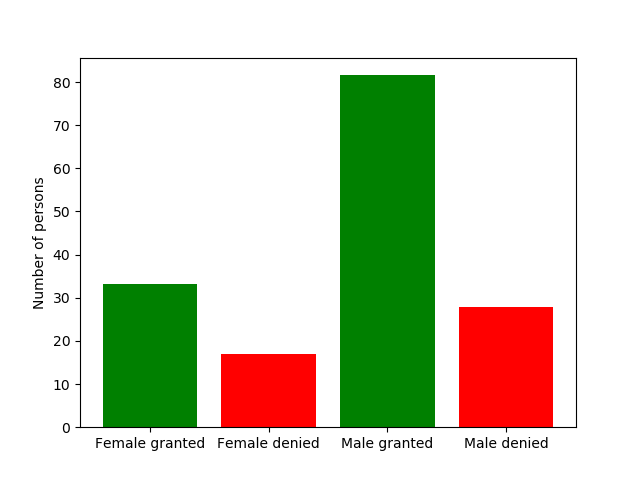  
While the number of loans granted increases, the distribution stays the somewhat the same, with 66.1% of women getting granted loans, while 74.5% of men got granted loans.  
Looking finally at loans over 10.000 DM:  
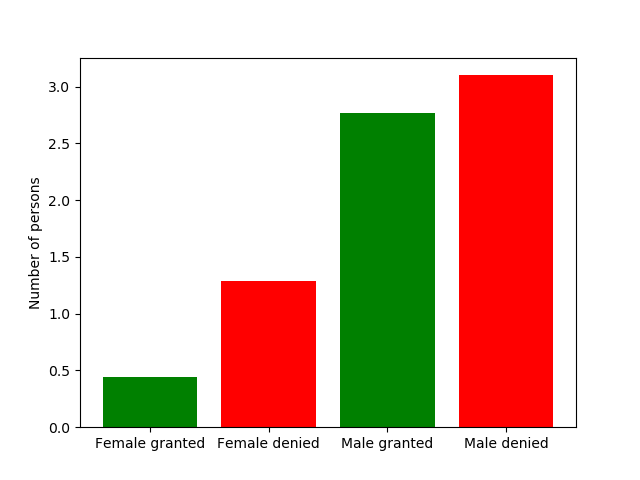  
Here there is a large gap between the amount of women and men getting granted loans. 25.4% of women gets their loans granted, while 47.2% of men does. Even though we'd like to draw some conclusion from this, we have to take the fact that there are very few people requesting loans over 10.000 DM into account. Over the 100 runs we did, an average of 0.44 women (just under half a woman) got the loan over 10.000, while 1.29 women got denied the loan. 2.77 men got the loan granted, while 3.1 men were denied the loan. This means that in our test set there were approximately 2 women and 6 men that applied for a loan over 10.000 DM, which unfortunately doesn't give us much to go on. It would seem, however, that our model is less likely to grant women large loans than men. Probably because it thinks women are slightly worse loan takers than men, and that the potential loss is bigger when we're considering large amounts.

## 3.5 Balancing fairness and utility <a id="part3_section5"></a>
*Advanced: Using stochastic gradient descent, find a policy that balances out fairness and utility.*
From the lecture on Tuesday we have that the balance can be defined as: 
$$F(\theta, \pi) = \sum_{a,y,z}|P^\pi_\theta(a|y,z)-P^\pi_\theta(a|y)|^2$$  
And the utility:  
$$U(\theta, \pi) = P^\pi_\theta(y=a)$$
Combining these gives us a value function: 
$$V(\lambda, \theta, \pi) = (1-\lambda)U(\theta,\pi)-\lambda F(\theta,\pi)$$
However, theta is still an unknown. As we are running out of time we will not start solving this problem, but we believe that by using this function, we could estimate the value of our policy taking both utility and fairness into account. This in turn, would be relatively easy to optimise using stochastic gradient descent


## Summary <a id="part4"></a>

To sum it up, we have created a model that we believe would preform well, implement decent privacy and, if we remove age and gender from the set of features, be somewhat fair. All of this assuming that the year is 1995. As of today, we would not recommend this model to any bank as far as granting loans are concerned.  
However, given new data, we strongly believe that we would be able to device a new model that can deliver good enough results, while still having sensitive data protected and taking things like gender equality into consideration.  
To use this in a real world scenario, we would obviously have to take things like GDPR into consideration regarding privacy, also the COVID-19 situation would make for an entirely different approach to fairness, which would be interesting to explore.

Further we would've liked to run all our experiments again implementing bootstrapping. We have an implementation of bootstrapping in TestLending2.py, but we are quite pressed for time at this point and will not be able to do that. We tried to run the banker with a held out test set of 200 and run it with bootstrapping and got the following results:  
Bootstrapping:  
Average utility: 1607365.18  
95% confidence interval utility 1056998.19 to 2262312.08  
Average return on investment: 253.91  
95% confidence interval return on investment 170.56 to 354.74  

Held out test set:  
Average utility: 1296356.47  
Return on investment: 233.11  

## Sources <a id="part5"></a>
[1] Christos Dimitrakakis: "*Machine learning in science and society*" (August 18, 2020). Collected from [GitHub](https://github.com/olethrosdc/ml-society-science/blob/master/notes.pdf).  
[2] Harry Zhang, The Optimality of Naive Bayes, 2004  
[3] International Association of Privacy Professionals: https://iapp.org/about/what-is-privacy/  
[4] Mehrabi, Morstatter, Saxena, Lerman and Galstyan, 2019, A survey on bias and fairness in machine learning.  